# Análisis exploratorio de datos

Permite:
- Organizar y entender las variables
- Establecer relaciones entre las variables
- Encontrar patrones ocultos entre los datos
- Permite elegir el modelo correcto para la necesidad
- Ayuda a tomar decisiones de forma informada

## Etapas del análisis exploratorio

|Hacer preguntas    |Determinar el tamaño de los datos   |Categorizar las variables   |Limpieza y validación de datos   |Establecer relaciones   |
|-                  |-  |-   |-   |-   |
|- Qué te gustaría encontrar? - Qué quisieras saber de los datos? - Cuál es la razón para realizar el análisis?|- Cuántas observaciones existen? - Cuántas variables hay? - Necesito todas las observaciones? - Necesito todas las variables?| - Cuántas variables categórucas o continuas tengo? - Cómo exploro cada variables dependiendo de la categoría|- Tengo valores faltantes? - Que proporción de datos me faltan? - Cuál es la distribución de datos? - Tengo valores atípicos?|- x e y se relacionan? - Se me agrupan las observaciones? - qué significa el patrón de distribución?|

Esto se da de forma ciclica hasta llegar a un resultado final.

## Tipos de análisis
- Descriptivo (past)
- Diagnóstico (past)
- Predictivo (future)
- Prescriptivo (future)

En general se requiere pasar por varios de estos pasos o tipos de análisis.

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
pre_penguin_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')

In [4]:
pre_penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [8]:
pre_penguin_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [9]:
pre_penguin_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [11]:
pre_penguin_df.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Análisis univariado
Tabulación
Proporciones

In [14]:
pre_penguin_df.describe(include="object")

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [16]:
(
    pre_penguin_df
    .astype({
        "species": "category",
        "island": "category",
        "sex": "category"
    })
    .describe(include="category")
)

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


<AxesSubplot: >

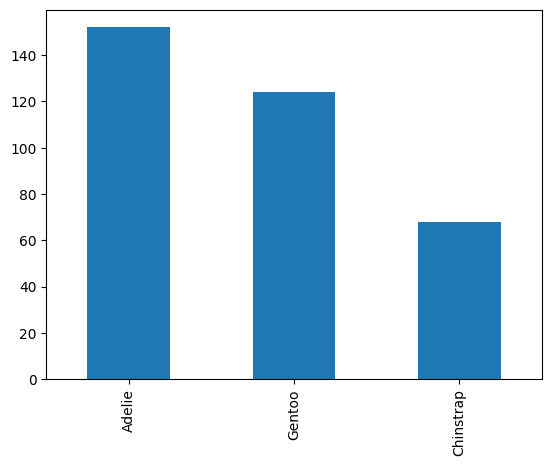

In [17]:
(
    pre_penguin_df
    .species
    .value_counts()
    .plot(
        kind="bar"
    )
)

### La ley de los grandes números
Al incrementar el tamaño de la muestra la probabilidad experimental tiende a la probabilidad teórica.

### Teorema del Límite Central
La suma de n variables aleatorias independientes con medias y varianzas finitas converge en distribución a una variable aleatoria con distribución nomal.

## Análisis bivariado

### Gráficos de distribución

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

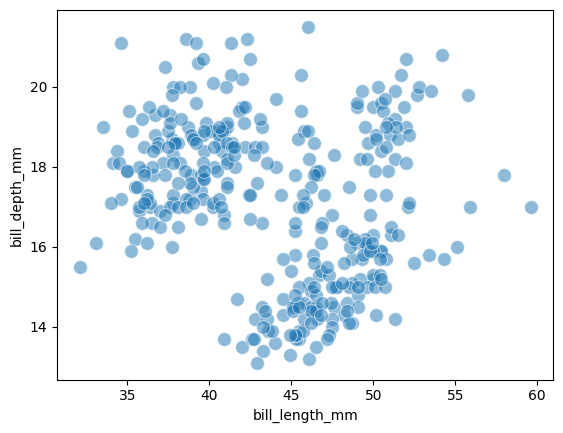

In [6]:
sns.scatterplot(
    data=pre_penguin_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    alpha=1/2,
    s=100 #size
)

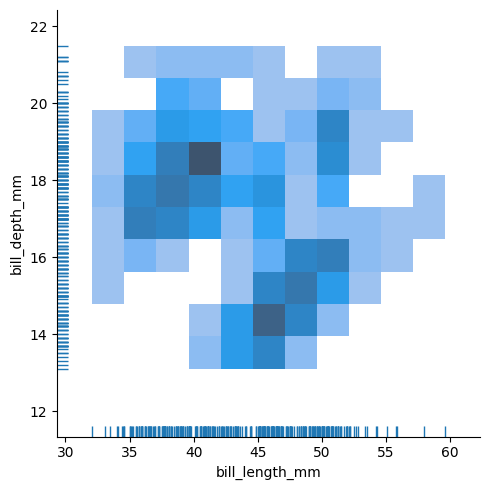

In [9]:
sns.displot(
    data=pre_penguin_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    rug=True
)

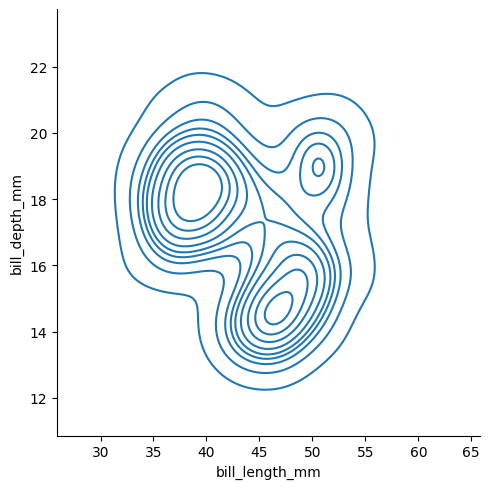

In [12]:
sns.displot(
    data=pre_penguin_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    kind="kde"
)

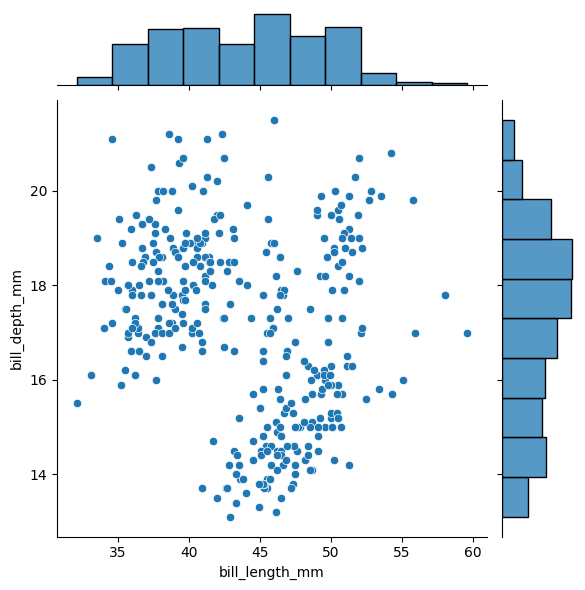

In [13]:
sns.jointplot(
    data=pre_penguin_df,
    x="bill_length_mm",
    y="bill_depth_mm",
)

### Gráficos de violin y boxplots

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

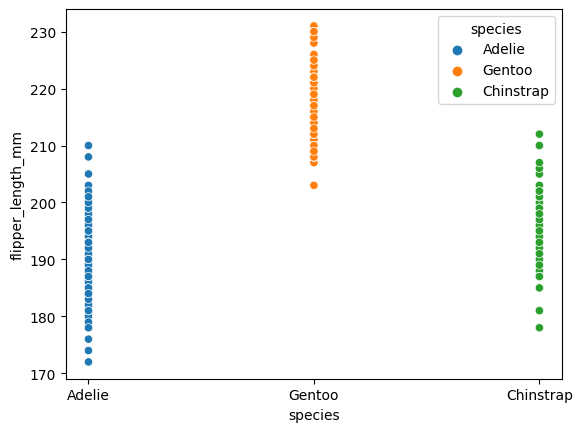

In [20]:
sns.scatterplot(
    data=pre_penguin_df,
    x="species",
    y="flipper_length_mm",
    hue="species"
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

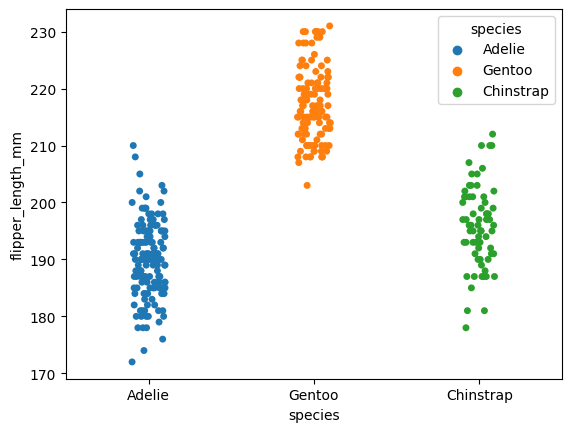

In [21]:
sns.stripplot(
    data=pre_penguin_df,
    x="species",
    y="flipper_length_mm",
    hue="species",

)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

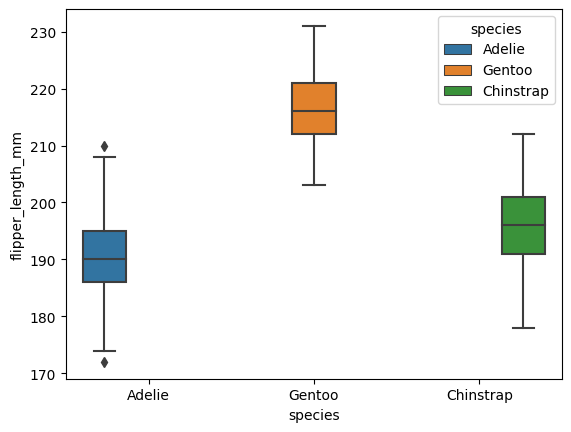

In [22]:
sns.boxplot(
    data=pre_penguin_df,
    x="species",
    y="flipper_length_mm",
    hue="species"
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

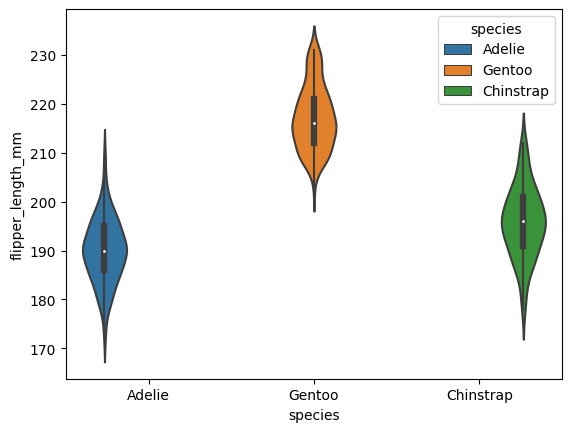

In [23]:
sns.violinplot(
    data=pre_penguin_df,
    x="species",
    y="flipper_length_mm",
    hue="species"
)

### Establecimiento de relaciones

C:\Users\rodri\AppData\Local\Temp\ipykernel_4780\2831183088.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=pre_penguin_df.corr(),


<AxesSubplot: >

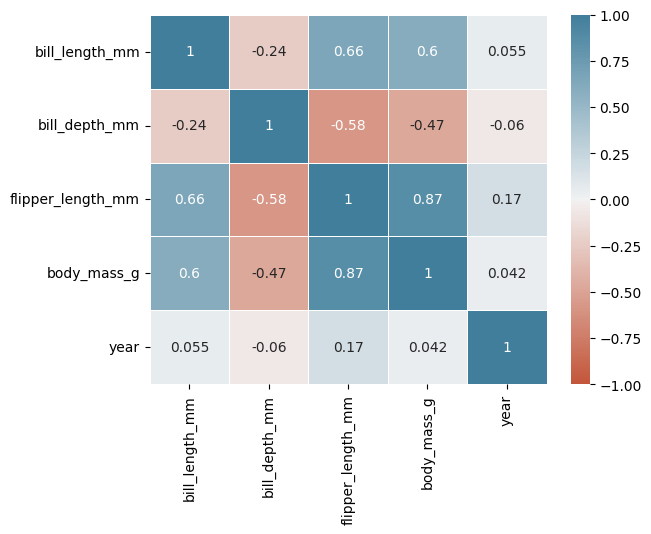

In [29]:
sns.heatmap(
    data=pre_penguin_df.corr(),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True,
    cmap=sns.diverging_palette(20,230, as_cmap=True)
)


C:\Users\rodri\AppData\Local\Temp\ipykernel_4780\260089719.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=pre_penguin_df.corr(),


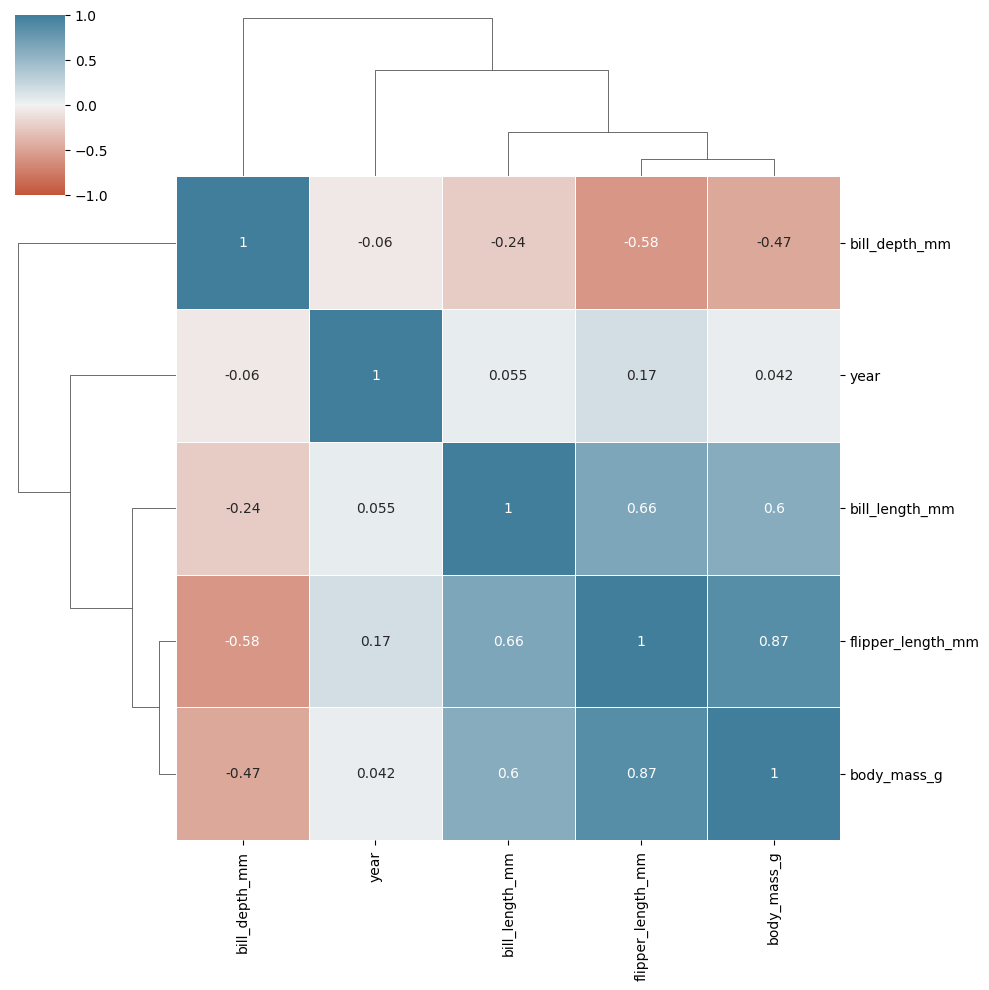

In [31]:
sns.clustermap(
    data=pre_penguin_df.corr(),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True,
    cmap=sns.diverging_palette(20,230, as_cmap=True)    
)

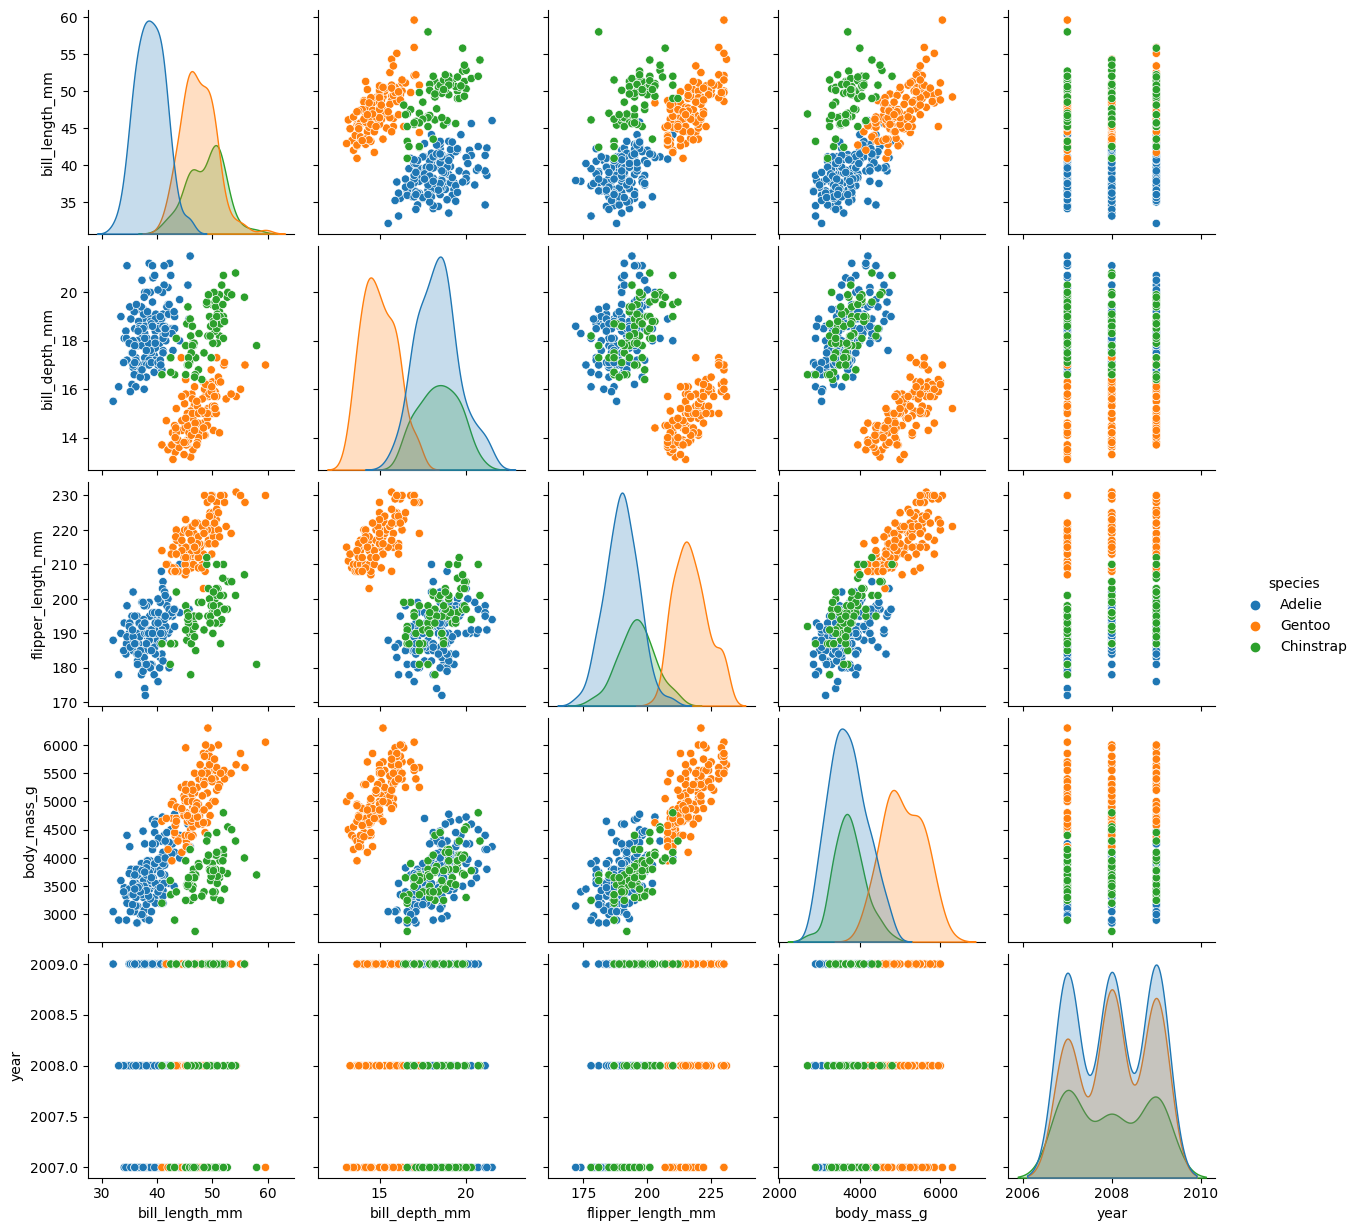

In [108]:
sns.pairplot(data=pre_penguin_df, hue="species")

In [85]:
from scipy import stats
import numpy as np


In [97]:
pre_penhuin=pre_penguin_df.dropna()

In [98]:
res_1 = stats.linregress(
    x = pre_penguin_df.bill_length_mm.values, 
    y = pre_penguin_df.bill_depth_mm.values  
    )
print(res_1)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)


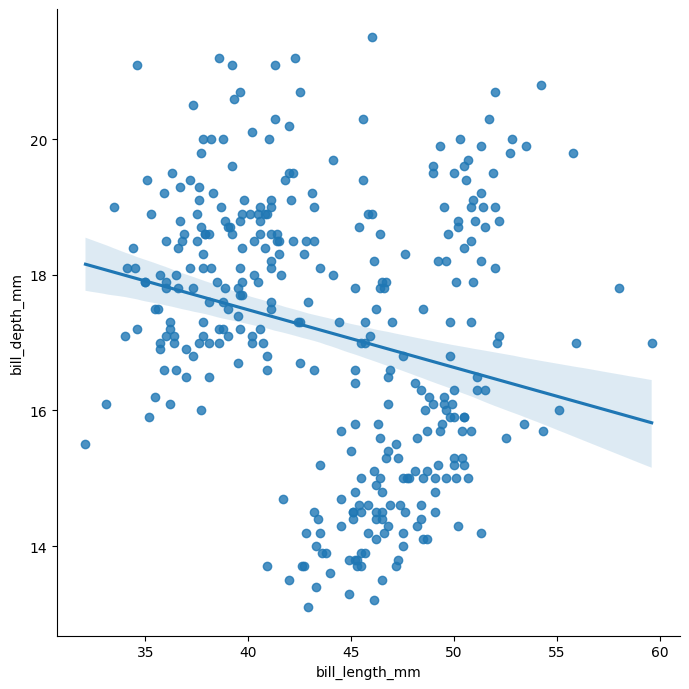

In [72]:
sns.lmplot(
    data = pre_penguin_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    height=7
)

## Análisis multivariado

### Regresión múltiple
Creando modelos

In [104]:
 import statsmodels.formula.api as smf

In [107]:
model_1 = (
    smf.ols(
        formula ="body_mass_g  ~ bill_length_mm",
        data = pre_penguin_df
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     186.4
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           3.81e-34
Time:                        22:19:09   Log-Likelihood:                -2697.0
No. Observations:                 342   AIC:                             5398.
Df Residuals:                     340   BIC:                             5406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        362.3067    283.345      1.279      0.202    -195.024     919.637
bill_length_mm    87.4153      6.402     13.654      0.000      74.823     100.008
==============================================================================
Omnibus:                        5.671   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.857
Skew:                          -0.211   Prob(JB):                       0.0882
Kurtosis:                       2.597   Cond. No.                         359.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
pre_penguin_df.dtypes.count()

8